In [1]:
def euler(f, a, b, n, ya):
    """
    Calculate the solution of the initial-value problem from Euler method
    Parameters:
        f: Function f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Initial value
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    vx = np.zeros(n)
    vy = np.zeros((n,2))

    h = (b - a) / n
    x = a
    y = ya

    vx[0] = x
    vy[0] = y

    fxy = f(y)
    print("i: {:03d}\t t: {:.4f}\t x: {:.4f}\t v: {:.4f}\n".format(0, x, y[0][0], y[0][1]), end="")

    for i in range(0, n):
        
        x = a + (i + 1) * h
        y = np.add(y, h * fxy, out=y, casting="unsafe").reshape((1,2))

        fxy = f(y)
        print("i: {:03d}\t t: {:.4f}\t x: {:.4f}\t v: {:.4f}\n".format(i + 1, x, y[0][0], y[0][1]), end="")
        vx[i] = x
        vy[i] = y
        

    return [vx, vy]



def rk4_system(f, a, b, n, ya):
    """
    Calculate the solution of systems of differential equations from
    Runge-Kutta (Order Four) method.
    Parameters:
        f: Array of functions f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Array of initial values
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    m = len(f)

    k = [np.zeros(m), np.zeros(m), np.zeros(m), np.zeros(m)]

    vx = np.zeros(n + 1)
    vy = np.zeros((m, n + 1))

    h = (b - a) / n

    x = a
    y = ya

    vx[0] = x
    vy[:, 0] = y

    for i in range(0, n):

        for j in range(0, m):
            k[0][j] = h * f[j](x, y)

        for j in range(0, m):
            k[1][j] = h * f[j](x + h / 2, y + k[0] / 2)

        for j in range(0, m):
            k[2][j] = h * f[j](x + h / 2, y + k[1] / 2)

        for j in range(0, m):
            k[3][j] = h * f[j](x + h, y + k[2])

        x = a + i * h
        y = y + (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6

        vx[i + 1] = x
        vy[:, i + 1] = y

    return [vx, vy]

In [2]:
import numpy as np 

In [3]:
# case one ; c = 5 (under damped) - euler method 

def f(X):
    
    return np.array([X[0][1], -0.05 * ((5*X[0][1]) + (20*X[0][0]))]).reshape(1,2)

t_euler_underdamped, X_euler_underdamped = euler(f, 0, 15, 150, np.array([1, 10e-12]).reshape(1,2))

i: 000	 t: 0.0000	 x: 1.0000	 v: 0.0000
i: 001	 t: 0.1000	 x: 1.0000	 v: -0.1000
i: 002	 t: 0.2000	 x: 0.9900	 v: -0.1975
i: 003	 t: 0.3000	 x: 0.9703	 v: -0.2916
i: 004	 t: 0.4000	 x: 0.9411	 v: -0.3813
i: 005	 t: 0.5000	 x: 0.9030	 v: -0.4659
i: 006	 t: 0.6000	 x: 0.8564	 v: -0.5445
i: 007	 t: 0.7000	 x: 0.8019	 v: -0.6165
i: 008	 t: 0.8000	 x: 0.7403	 v: -0.6813
i: 009	 t: 0.9000	 x: 0.6721	 v: -0.7383
i: 010	 t: 1.0000	 x: 0.5983	 v: -0.7871
i: 011	 t: 1.1000	 x: 0.5196	 v: -0.8272
i: 012	 t: 1.2000	 x: 0.4369	 v: -0.8585
i: 013	 t: 1.3000	 x: 0.3510	 v: -0.8807
i: 014	 t: 1.4000	 x: 0.2629	 v: -0.8938
i: 015	 t: 1.5000	 x: 0.1736	 v: -0.8978
i: 016	 t: 1.6000	 x: 0.0838	 v: -0.8927
i: 017	 t: 1.7000	 x: -0.0055	 v: -0.8787
i: 018	 t: 1.8000	 x: -0.0934	 v: -0.8562
i: 019	 t: 1.9000	 x: -0.1790	 v: -0.8255
i: 020	 t: 2.0000	 x: -0.2615	 v: -0.7870
i: 021	 t: 2.1000	 x: -0.3402	 v: -0.7411
i: 022	 t: 2.2000	 x: -0.4143	 v: -0.6886
i: 023	 t: 2.3000	 x: -0.4832	 v: -0.6299
i: 024	 t:

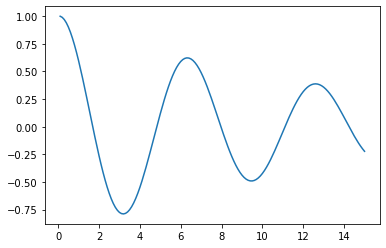

In [4]:
import matplotlib.pyplot as plt 

plt.plot(t_euler_underdamped, X_euler_underdamped[:, 0])

In [5]:
# case one ; c = 5 (under damped) - rk4 method

F = [lambda t, X : X[0][1], lambda t, X : -0.05 * ((5*X[0][1]) + (20*X[0][0]))]

     
trk4_underdamped, X_rk4_underdamped = rk4_system(F, 0, 15, 150, np.array([1, 10e-12]).reshape(1,2))


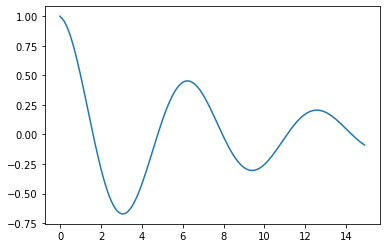

In [6]:
import matplotlib.pyplot as plt 

plt.plot(trk4_underdamped, X_rk4_underdamped[0, :])

In [7]:
#case two ; c = 40 (critically damped) - euler method
def f(X):
    
    return np.array([X[0][1], -0.05 * ((40*X[0][1]) + (20*X[0][0]))]).reshape(1,2)

t_euler_cdamped, X_euler_cdamped = euler(f, 0, 15, 150, np.array([1, 10e-12]).reshape(1,2))

i: 000	 t: 0.0000	 x: 1.0000	 v: 0.0000
i: 001	 t: 0.1000	 x: 1.0000	 v: -0.1000
i: 002	 t: 0.2000	 x: 0.9900	 v: -0.1800
i: 003	 t: 0.3000	 x: 0.9720	 v: -0.2430
i: 004	 t: 0.4000	 x: 0.9477	 v: -0.2916
i: 005	 t: 0.5000	 x: 0.9185	 v: -0.3280
i: 006	 t: 0.6000	 x: 0.8857	 v: -0.3543
i: 007	 t: 0.7000	 x: 0.8503	 v: -0.3720
i: 008	 t: 0.8000	 x: 0.8131	 v: -0.3826
i: 009	 t: 0.9000	 x: 0.7748	 v: -0.3874
i: 010	 t: 1.0000	 x: 0.7361	 v: -0.3874
i: 011	 t: 1.1000	 x: 0.6974	 v: -0.3835
i: 012	 t: 1.2000	 x: 0.6590	 v: -0.3766
i: 013	 t: 1.3000	 x: 0.6213	 v: -0.3672
i: 014	 t: 1.4000	 x: 0.5846	 v: -0.3559
i: 015	 t: 1.5000	 x: 0.5490	 v: -0.3432
i: 016	 t: 1.6000	 x: 0.5147	 v: -0.3294
i: 017	 t: 1.7000	 x: 0.4818	 v: -0.3150
i: 018	 t: 1.8000	 x: 0.4503	 v: -0.3002
i: 019	 t: 1.9000	 x: 0.4203	 v: -0.2852
i: 020	 t: 2.0000	 x: 0.3917	 v: -0.2702
i: 021	 t: 2.1000	 x: 0.3647	 v: -0.2553
i: 022	 t: 2.2000	 x: 0.3392	 v: -0.2407
i: 023	 t: 2.3000	 x: 0.3151	 v: -0.2265
i: 024	 t: 2.4000

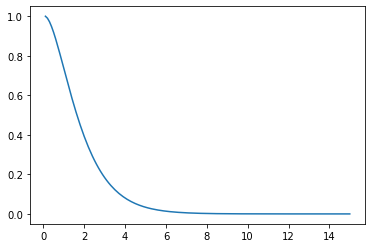

In [8]:
import matplotlib.pyplot as plt 

plt.plot(t_euler_cdamped, X_euler_cdamped[:, 0])

In [9]:
# case two ; c = 20 (critical) - rk4 method

F = [lambda t, X : X[0][1], lambda t, X : -0.05 * ((40*X[0][1]) + (20*X[0][0]))]

     
trk4_cdamped, X_rk4_cdamped = rk4_system(F, 0, 15, 150, np.array([1, 10e-12]).reshape(1,2))

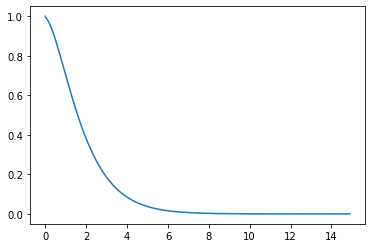

In [10]:
import matplotlib.pyplot as plt 

plt.plot(trk4_cdamped, X_rk4_cdamped[0, :])

In [11]:
#case three ; c = 200 (overdamped) - euler method
def f(X):
    
    return np.array([X[0][1], -0.05 * ((200*X[0][1]) + (20*X[0][0]))]).reshape(1,2)

t_euler_overdamped, X_euler_overdamped = euler(f, 0, 15, 150, np.array([1, 10e-12]).reshape(1,2))

i: 000	 t: 0.0000	 x: 1.0000	 v: 0.0000
i: 001	 t: 0.1000	 x: 1.0000	 v: -0.1000
i: 002	 t: 0.2000	 x: 0.9900	 v: -0.1000
i: 003	 t: 0.3000	 x: 0.9800	 v: -0.0990
i: 004	 t: 0.4000	 x: 0.9701	 v: -0.0980
i: 005	 t: 0.5000	 x: 0.9603	 v: -0.0970
i: 006	 t: 0.6000	 x: 0.9506	 v: -0.0960
i: 007	 t: 0.7000	 x: 0.9410	 v: -0.0951
i: 008	 t: 0.8000	 x: 0.9315	 v: -0.0941
i: 009	 t: 0.9000	 x: 0.9221	 v: -0.0931
i: 010	 t: 1.0000	 x: 0.9128	 v: -0.0922
i: 011	 t: 1.1000	 x: 0.9035	 v: -0.0913
i: 012	 t: 1.2000	 x: 0.8944	 v: -0.0904
i: 013	 t: 1.3000	 x: 0.8854	 v: -0.0894
i: 014	 t: 1.4000	 x: 0.8764	 v: -0.0885
i: 015	 t: 1.5000	 x: 0.8676	 v: -0.0876
i: 016	 t: 1.6000	 x: 0.8588	 v: -0.0868
i: 017	 t: 1.7000	 x: 0.8501	 v: -0.0859
i: 018	 t: 1.8000	 x: 0.8416	 v: -0.0850
i: 019	 t: 1.9000	 x: 0.8331	 v: -0.0842
i: 020	 t: 2.0000	 x: 0.8246	 v: -0.0833
i: 021	 t: 2.1000	 x: 0.8163	 v: -0.0825
i: 022	 t: 2.2000	 x: 0.8081	 v: -0.0816
i: 023	 t: 2.3000	 x: 0.7999	 v: -0.0808
i: 024	 t: 2.4000

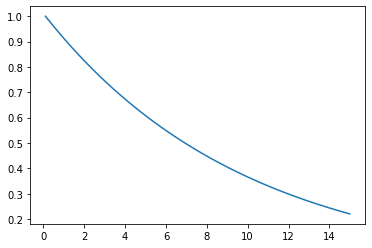

In [12]:
import matplotlib.pyplot as plt 

plt.plot(t_euler_overdamped, X_euler_overdamped[:, 0])

In [13]:
# case three ; c = 200 (critical) - rk4 method

F = [lambda t, X : X[0][1], lambda t, X : -0.05 * ((200*X[0][1]) + (20*X[0][0]))]

     
trk4_overdamped, X_rk4_overdamped = rk4_system(F, 0, 15, 150, np.array([1, 10e-12]).reshape(1,2))

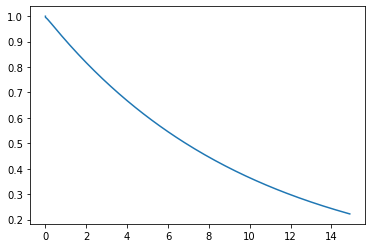

In [14]:
import matplotlib.pyplot as plt 

plt.plot(trk4_overdamped, X_rk4_overdamped[0, :])

# final result : 

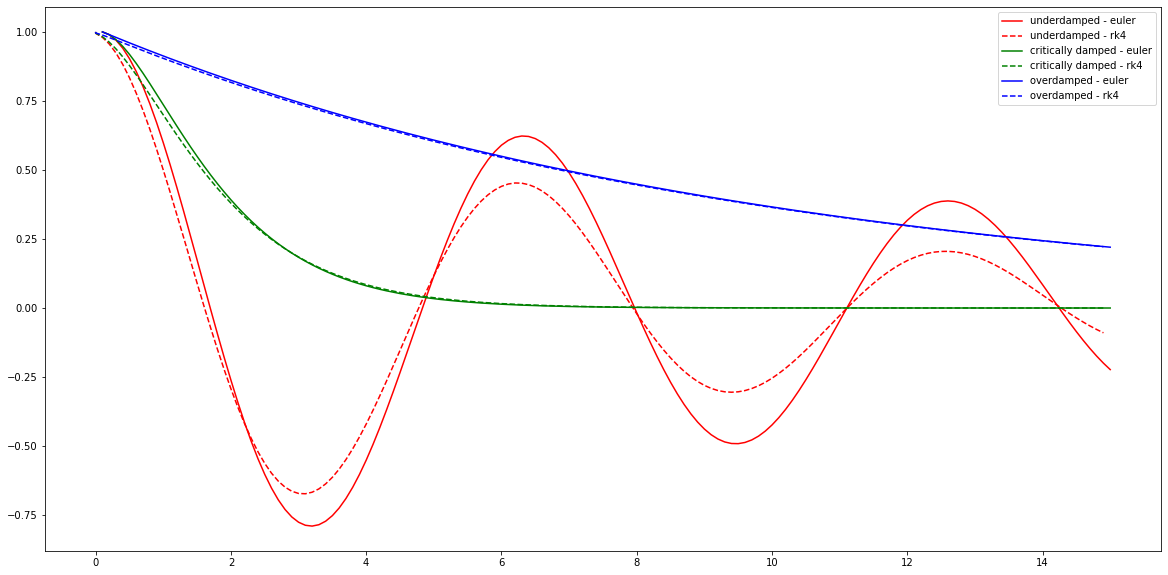

In [15]:
plt.figure(figsize=(20, 10))

plt.plot(t_euler_underdamped, X_euler_underdamped[:,0], 'r', label ='underdamped - euler')
plt.plot(trk4_underdamped, X_rk4_underdamped[0,:], 'r--', label ='underdamped - rk4')

plt.plot(t_euler_cdamped, X_euler_cdamped[:,0], 'g', label ='critically damped - euler')
plt.plot(trk4_cdamped, X_rk4_cdamped[0,:], 'g--', label ='critically damped - rk4')

plt.plot(t_euler_overdamped, X_euler_overdamped[:,0], 'b', label ='overdamped - euler')
plt.plot(trk4_overdamped, X_rk4_overdamped[0,:], 'b--', label ='overdamped - rk4')

plt.legend()